# Modelado de Probabilidades de Clase con Regresión Logística #
El problema principal con el perceptrón es que nunca converge si si las clases no son perfectamente linealmente separables.

Se puede utilizar otro algoritmo simple, pero potente, para problemas de clasificación lineal y binario denominaodo **regresión logística**. Pese a su nombre, la regresión logística es un modelo para clasificación y no regresión.

### Regresión logística y probabilidades condicionales ###
Como ya se ha dicho, la regresión logística es un **modelo lineal de clasificación** muy fácil de implementar y con un muy buen rendimiento en clases separables linealmente.

> ##### Regresión logística para múltiples clases #####
> Hay que tener en cuenta que la regresión logística se puede generalizar fácilmente a configuraciones multiclase, lo que se conoce como **regresión logística multinomial** o **regresión softmax**.
> Otra forma de utilizar la regresión logística en entornos multiclase es a través de la técnica OvR.

##### Posibilidad (odds) #####
Para explicar la idea detras de la regresión logística como modelo probabilístico para la clasificación binaria, se va a introducir la idea de **posibilidad (odds)**: las probabilidades a favor de un evento en particular. La posibilidad se puede expresar por $\frac{p}{1-p}$ donde $p$ expreasa la probabilidad de un evento de interes.

##### Función logit #####
La función logit es simplemente el logaritmo neperiano o natural de la posibilidad (log-odds):

$$logit(p) = ln \frac{p}{1 - p}$$

La funcioón *logit* toma valores de entrada entre `0`y `1` y los transforma a valores de todo el rango de números reales que se puede utilizar para expresar una relación lineal entre los valores de las características y el log-odds:

$$logit(p(y = 1|\textbf{x})) = w_0x_0 + w_1x_1 + \ldots + w_mx_m = \sum_{i=0}^mw_ix_i = \textbf{w}^T\textbf{x}$$

Donde $logit(p(y = 1|\textbf{x}))$ es la probabilidad condicional de que un ejemplo en particular pertenezca a la clase $1$ dado sus características $\textbf{x}$.

##### Función sigmoidal #####
Como en lo que se está realmente interesado es en predecir la probabilidad de que un determinado ejemplo pertenezca a una determinada clase, lo que se necesita es la __*forma inversa de la función logistica*__, que se denomina **función sigmoidal logística** o simplemente **función sigmoidal** debido a su forma en 'S' característica:

$$\phi (z) = \frac{1}{1 + e^{-z}}$$

Donde $z$ es la entrada neta, es decir, la combinación lineal de pesos y las entradas (las características asociadas a los ejemploos de entrad):

$$z = \textbf{w}^T\textbf{x} = w_0x_0 + w_1x_1 + \ldots + w_mx_m$$

Donde $w_0$ representa la unidad de sesgo y $x_0$ la entrada adicional cuyo valor es $1$.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

<IPython.core.display.Javascript object>


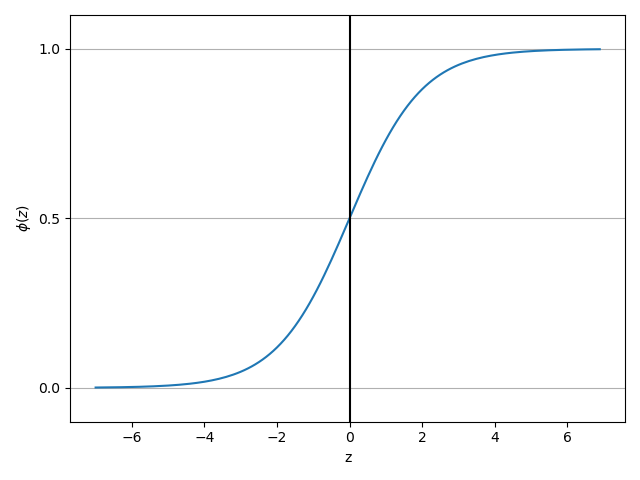

In [4]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

se observa que $\phi (z)$ se aproxima a $1$ cuando $z$ tiende a infinito ($z \rightarrow \infty$) ya que $e^{-z}$ se vuelve muy pequeño para valores grandes de $z$. De forma similar, $\phi (z)$ tiende a $0$ cuando $z \rightarrow -\infty$ ya que el denomimador se va haciendo cada vez más grando para valores pequeños de $z$.

La diferencia entre Adaline y la regresión logística es que en la primera se utiliza una *función lienal*, mientras que en la segunda se utiliza la *función sigmoidal*.

![Adaline vs Regresión Logística](imgs/adalinevlogit.png)

El resultado de la función sigmoidal  se interpreta como la probabilidad de que un determinado ejemplo pertenezca a la clase $1$, $\phi (z) = P(y = 1|\textbf{x};\textbf{w})$, dado sus características, $x$, parametrizas por los pesos, $w$.

La probabilidad predecidad se puede transforma después en un resultado binario simplemente por medio de una función umbral:

$$\hat{y} =  \begin{cases} 1 & \text{si }\phi (z) \geq 0.5 \\ 0 & sino \end{cases}$$

Si se mira la gráfica de la función sigmoidal, esto es eqivalente a:

$$\hat{y} =  \begin{cases} 1 & \text{si z} \geq 0.5 \\ 0 & sino \end{cases}$$


### Aprender los pesos de la función de coste logística ###
Para explicar como derivar la función de coste para la regresión logística primero definimos la **función de verosimilitud**, $L$, que se pretende **maximizar** cuando se construye un modelo de regresión logistica, asumiendo que los ejemplos individuales en el conjunto de datos son independientes unos de otros. La fórmula es la siguiente:

$$L(\textbf{w}) = P(\textbf{y}|\textbf{x};\textbf{w}) = \prod_{i=1}^{n}P(y^{(i)}|x^{(i)};\textbf{w}) = \prod_{i=1}^{n}(\phi (z^{(i)}))^{y^{(i)}}(1 - \phi (z^{(i)}))^{1 - y^{(i)}}$$

En la práctica, es más fácil maximizar el logaritmo neperiano de esta función, denominado **función logartimo de verosimilitud**, $l$:

$$l(\textbf{w}) = ln L(\textbf{w}) = \sum_{i=1}^{n}[y^{(i)}ln(\phi (z^{(i)}))  + (1 - y^{(i)})ln(1 - \phi (z^{(i)}))]$$

Ahora, se podría utilizar un **algoritmod de optimización** como el **gradiente ascendente** para **maximizar** esta función logaritmo de verosimilitud.

##### Función de Coste #####
La **funcón de coste** que se utiliza en la regresión logística es la reescritura de la función logaritmo de verosimilitud como una función de coste, $J$, que se puede **minimimar** mediante el **gradiente descendente** que ya se ha visto.

$$J(\textbf{w}) = \sum_{i=1}^{n}[-y^{(i)}ln(\phi (z^{(i)})) - (1 - y^{(i)})ln(1 - \phi (z^{(i)}))]$$

Para tener una mejor percepción de esta función de coste, se va a hecar un vistazo al coste que se calcula para un único ejemplo de entrenamiento:

$$J(\phi (z),y;\textbf{w}) = -yln(\phi (z)) - (1 - y)ln(1 - \phi (z))$$

Se pude observar que el primer término se convierte en $0$ si $y=0$, y el segundo es $0$ si $y=1$

$$J(\phi (z),y;\textbf{w}) =  \begin{cases} -ln(\phi (z)) & \text{si }y=1 \\ -ln(1-\phi (z)) & \text{si }y=0 \end{cases}$$

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [6]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

<IPython.core.display.Javascript object>


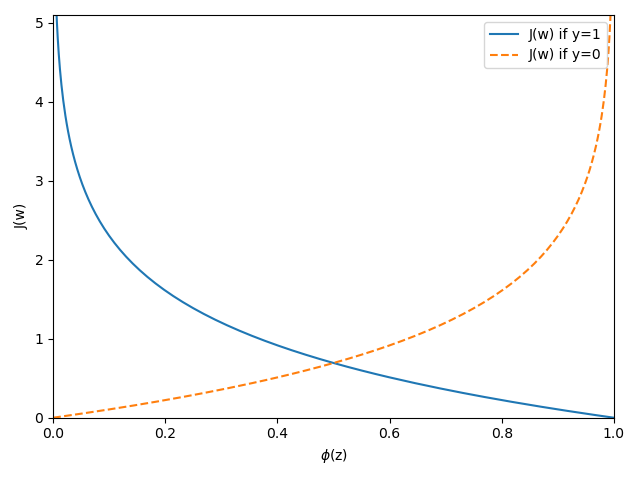

In [7]:
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

El gráfico resultante muestra la activación sigmoidea en el eje $x$ en el rango de $0$ a $1$ (las entradas a la función sigmoidea fueron valores $z$ en el rango $–10$ a $10$) y el costo logístico asociado en el eje $y$.

Se puede ver que el costo se aproxima a $0$ (línea continua) si predecimos correctamente que un ejemplo pertenece a la clase $1$. De manera similar, podemos ver en el eje $y$ que el costo también se acerca a $0$ si predecimos correctamente $y = 0$ (línea discontinua). Sin embargo, si la predicción es incorrecta, el costo va hacia el infinito. El hecho a destacar es que penalizamos las predicciones erróneas con un costo cada vez mayor.

### Implementación del algoritmo para la Regresión Logística ###

In [14]:
class LogisticRegressionGD(object):
    """Clasificador de Regresión Logística que utiliza el 
        gradiente descendente.
    
    Parametros
    ----------
    eta : float
        Tasa de aprendizaje (entre 0.0 y 1.0)
    n_iter : int
        Número de épocas.
    random_state : int
        Generador de números aleatorias para la inicialización
        de los pesos.
    
    Atributos
    ---------
    w_ : 1d-array
        Pesos calculados.
    cost_ : list
        Valor de la función de coste logística para cada época.
    
    """
    def __init__(self, eta=0.5, n_iter=100, random_state=100):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """ Encaje de los datos de entrenamiento.
        
        Parametros
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Vectores de entrenamientos, donde n_examples es el
            número de ejemplos y n_features es el número de 
            característica.
        y : array-like, shape = [n_examples]
            Valores objetivo.
        
        Retorno
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # Ahora se calcula el 'coste' logístico
            # en lugar del coste de las suma del cuadrado
            # de los erroes
            cost = (-y.dot(np.log(output)) - 
                       ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, X):
        """Cálculo de la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """Cálcula la activación sigmoidal logística"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """Devuelve la etiquta de clase aplicando la función
           escalón unitario
            """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Hay que tener en cuenta que esta implementación solo funciona para clasificaciones binarias.

In [18]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='conjunto test')

<IPython.core.display.Javascript object>


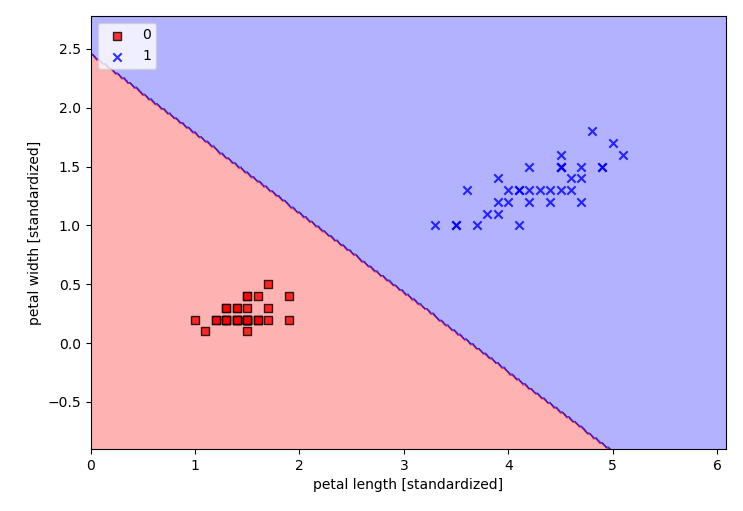

In [19]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05,
                            n_iter=1000,
                            random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

> ### Gradiente descendente para la regresión logística ###
> Primero se calcula las derivadas parciales de la función log de verosimilitud con respecto al peso *j*-esimo:
> 
> $$\frac{\partial }{\partial w_j}l(w) = (y\frac{1}{\phi (z)} - (1 - y)\frac{1}{1 - \phi (z)})\frac{\partial }{\partial w_j}\phi (z)$$
>
> También hay que calcular la derivada de la función sigmoide
> $$\frac{\partial }{\partial z}\phi (z) = \frac{\partial }{\partial z}\frac{1}{1 + e^{-z}} = \frac{1}{(1 + e^{-z})^2}e^{-z} = \frac{1}{1 + e^{-z}}(1-\frac{1}{1 + e^{-z}}) = \phi (z)(1 - \phi(z))$$
>
> Sustituyendo este resultado en la primera ecuación se tiene
>
> $$(y\frac{1}{\phi (z)} - (1 - y)\frac{1}{1 - \phi (z)})\frac{\partial }{\partial w_j}\phi (z) = (y\frac{1}{\phi (z)} - (1 - y)\frac{1}{1 - \phi (z)})\phi (z)(1 - \phi(z))\frac{\partial}{\partial w_j}z$$